In [1]:
import pandas as pd
import ast
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib


In [2]:
# read dataset.csv
df = pd.read_csv("Getranke.csv",sep=';', encoding ='utf-8')

df = df.drop_duplicates(['recipe_name'])

y = df[df['recipe_url'] =='[]']
index = y.index.tolist()
df = df.drop(index =[13689])
df.shape

df


,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url
0,Getränke,Bananendrink 2. Art,"['Getränk', 'Vegetarisch', 'Schnell', 'einfach...",3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,NaN,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...
1,Getränke,Obst-Smoothie mit Avocado und Ingwer,"['Getränk', 'Vegetarisch', 'Vegan', 'Frucht', ...",3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...
2,Getränke,Baccardibowle,"['Getränk', 'Bowle']",3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...
3,Getränke,Russian Bahama Mama,"['Cocktail', 'Getränk', 'Party']",3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...
4,Getränke,Pfirsich - Bananen - Smoothie,"['Getränk', 'Sommer', 'Vegetarisch', 'Schnell'...",3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,NaN,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...
...,...,...,...,...,...,...,...,...,...,...,...
14529,Getränke,Brombeerlikör mit innerer Glut,"['Getränk', 'Herbst', 'Likör']",4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,NaN,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...
14530,Getränke,Cappucino Longata Speziale,"['Getränk', 'KaffeeTeeoderKakao']",4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...
14531,Getränke,Capt'n Cockienov,"['Getränk', 'Longdrink']",4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,NaN,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...
14532,Getränke,Schoko-Sahnelikör,"['Getränk', 'Schnell', 'einfach', 'Likör']",4.14,simpel,"['200ml', 'Eierlikör', '200ml', 'Amaretto', '2...",5,NaN,10 Min,"[{'rating': 'rating-5', 'comment_time': '08.11...",https://www.chefkoch.de/rezepte/21009613390138...


In [3]:
# data pre-processing

# If NaN for calorie and comment user -> change it to none!   
values_cal = {'calorie': 'none'}  
df = df.fillna(value=values_cal)
values_com = {'comment_user': 'no comment'} 
df = df.fillna(value=values_com)

pat = r"([-+]?\d*\.\d+|\d+)"
df["pre_time"] = df["preparation_time"].str.extract(pat, flags=0, expand=True)

# extract the recipe id from recipe urls
list_cat_no = []
i = 0
for item in df['recipe_url']:
    list_cat_no.append(item.split('/')[4])

# add one column "recipe_id" into the dataset and set it as the index of dataset
df['recipe_id'] = list_cat_no
df = df.set_index(["recipe_id"])

df_cat = df['tags']
# df_cat = df_cat[0:10]

import string 
punct = set(string.punctuation) 

# get the sub categroien of tags
def get_sub_cat(data):
    list_tags = []
    for item in df_cat.iteritems():
        if (item != '[]'):
            item_tag = item[1]
            list_cat = list(item_tag)
            list_cat_new = ''.join(x for x in list_cat if x not in punct) 
            target_list = [x for x in list_cat_new.split(' ')]
            list_tags.append(target_list[-1])
    return list_tags

df['sub_categorize'] = get_sub_cat(df_cat)
df

,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time,sub_categorize
recipe_id,,,,,,,,,,,,,
1769081286862304,Getränke,Bananendrink 2. Art,"['Getränk', 'Vegetarisch', 'Schnell', 'einfach...",3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,none,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...,5,alkoholfrei
3012431454075648,Getränke,Obst-Smoothie mit Avocado und Ingwer,"['Getränk', 'Vegetarisch', 'Vegan', 'Frucht', ...",3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...,5,Shake
38671013004033,Getränke,Baccardibowle,"['Getränk', 'Bowle']",3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...,10,Bowle
2338891372270191,Getränke,Russian Bahama Mama,"['Cocktail', 'Getränk', 'Party']",3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...,2,Party
1825151296038527,Getränke,Pfirsich - Bananen - Smoothie,"['Getränk', 'Sommer', 'Vegetarisch', 'Schnell'...",3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...,5,Vollwert
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087751337250043,Getränke,Brombeerlikör mit innerer Glut,"['Getränk', 'Herbst', 'Likör']",4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,none,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...,45,Likör
169051073397375,Getränke,Cappucino Longata Speziale,"['Getränk', 'KaffeeTeeoderKakao']",4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...,10,KaffeeTeeoderKakao
2786451430770696,Getränke,Capt'n Cockienov,"['Getränk', 'Longdrink']",4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...,2,Longdrink


# Recipe Rating Distribution

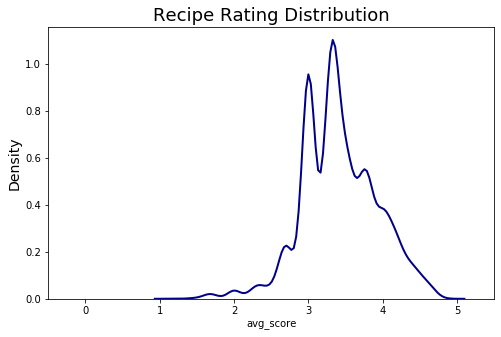

In [37]:
# delete the recipes, which have no average score.
df_null_score = df[df['avg_score'] =='0']
index_s = df_null_score.index.tolist()
df_avg = df.drop(index =index_s)
df_avg

avg_count = df_avg['avg_score'].value_counts()
df_count = avg_count.to_frame()
df_count
list_score = avg_count.index.tolist()
list_score
d = df_avg['avg_score'].value_counts()
list_count = d.values.tolist()
list_count

from pandas.core.frame import DataFrame
import seaborn as sns

plt.figure(figsize=(8, 5))
# x = pd.Series(df_avg['avg_score'], name="avg_score")
# ax = sns.distplot(x)
sns.distplot(df_avg['avg_score'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.title('Recipe Rating Distribution', fontsize=18)
plt.xlim(-0.5,5.5,0.8)
plt.ylabel('Density',fontsize=14)
plt.show()



# preparation time of recipes in different kinds of drinks

In [38]:
# delete recipes, which has the most high preparation time but only one
df_time = df.groupby('preparation_time').filter(lambda x: len(x) > 10)

# divide the recipes into different preparation time groups
def pre_time_group(pre_time):   
    pre_time = int(pre_time)    
    if pre_time < 20:
        bucket = '<20 Min'    
    if pre_time in range(20, 41):
        bucket = '20-40 Min'        
    if pre_time in range(40, 61):
        bucket = '40-60 Min'        
    if pre_time in range(60, 81):
        bucket = '50-59 Min'
    if pre_time >= 81:
        bucket = '80+ Min'
    return bucket

df_time['pretime_group'] = df_time['pre_time'].apply(pre_time_group)
df_time


/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,categorize,recipe_name,tags,avg_score,difficulty,ingredient,rating_count,calorie,preparation_time,comment_user,recipe_url,pre_time,sub_categorize,pretime_group
recipe_id,,,,,,,,,,,,,,
1769081286862304,Getränke,Bananendrink 2. Art,"['Getränk', 'Vegetarisch', 'Schnell', 'einfach...",3.86,simpel,"['1', 'Banane(n)', '150ml', 'Kirschsaft', '150...",5,none,5 Min,"[{'rating': 'rating-5', 'comment_time': '06.08...",https://www.chefkoch.de/rezepte/17690812868623...,5,alkoholfrei,<20 Min
3012431454075648,Getränke,Obst-Smoothie mit Avocado und Ingwer,"['Getränk', 'Vegetarisch', 'Vegan', 'Frucht', ...",3.86,simpel,"['1', 'Banane(n)', '1', 'Orange(n)(Bio),1/4der...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '21.03...",https://www.chefkoch.de/rezepte/30124314540756...,5,Shake,<20 Min
38671013004033,Getränke,Baccardibowle,"['Getränk', 'Bowle']",3.86,simpel,"['1Flasche', 'Rum(Baccardi)', '1Flasche', 'Sek...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '15.02...",https://www.chefkoch.de/rezepte/38671013004033...,10,Bowle,<20 Min
2338891372270191,Getränke,Russian Bahama Mama,"['Cocktail', 'Getränk', 'Party']",3.86,simpel,"['2cl', 'Wodka', '2cl', 'MalibuCoconutRum', '4...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '09.03...",https://www.chefkoch.de/rezepte/23388913722701...,2,Party,<20 Min
1825151296038527,Getränke,Pfirsich - Bananen - Smoothie,"['Getränk', 'Sommer', 'Vegetarisch', 'Schnell'...",3.86,simpel,"['1große', 'Banane(n),gefroren', '2große', 'Pf...",5,none,5 Min,"[{'rating': 'rating-4', 'comment_time': '06.03...",https://www.chefkoch.de/rezepte/18251512960385...,5,Vollwert,<20 Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087751337250043,Getränke,Brombeerlikör mit innerer Glut,"['Getränk', 'Herbst', 'Likör']",4.14,normal,"['3,4kg', 'Brombeeren,reif,tiefgefroren', '200...",5,none,45 Min,"[{'rating': 'rating-4', 'comment_time': '27.10...",https://www.chefkoch.de/rezepte/20877513372500...,45,Likör,40-60 Min
169051073397375,Getränke,Cappucino Longata Speziale,"['Getränk', 'KaffeeTeeoderKakao']",4.14,simpel,"['1Tasse/n', 'Kaffee(Cappucino)', '1Tasse/n', ...",5,none,10 Min,"[{'rating': 'rating-5', 'comment_time': '09.11...",https://www.chefkoch.de/rezepte/16905107339737...,10,KaffeeTeeoderKakao,<20 Min
2786451430770696,Getränke,Capt'n Cockienov,"['Getränk', 'Longdrink']",4.14,simpel,"['4cl', 'GoldRum', '4cl', 'Wodka', '22cl', 'Co...",5,none,2 Min,"[{'rating': 'rating-4', 'comment_time': '08.06...",https://www.chefkoch.de/rezepte/27864514307706...,2,Longdrink,<20 Min


/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 1.0, 'Preparation Time Distribution')

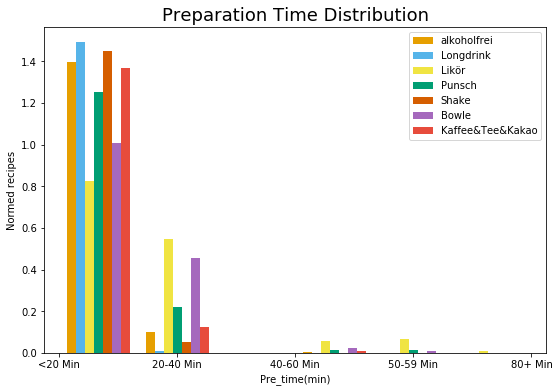

In [10]:
# Make a separate list for each kind of drinks
x1 = list(df_time[df_time['sub_categorize'] == 'alkoholfrei']['pretime_group'])
x2 = list(df_time[df_time['sub_categorize'] == 'Longdrink']['pretime_group'])
x3 = list(df_time[df_time['sub_categorize'] == 'Likör']['pretime_group'])
x4 = list(df_time[df_time['sub_categorize'] == 'Punsch']['pretime_group'])
x5 = list(df_time[df_time['sub_categorize'] == 'Shake']['pretime_group'])
x6 = list(df_time[df_time['sub_categorize'] == 'Bowle']['pretime_group'])
x7 = list(df_time[df_time['sub_categorize'] == 'KaffeeTeeoderKakao']['pretime_group'])

# Assign colors for each type and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','#A569BD','#E74C3C']
names = ['alkoholfrei', 'Longdrink', 'Likör',
         'Punsch', 'Shake','Bowle','Kaffee&Tee&Kakao']
         
# Make the histogram using a list of lists
# Normalize the frequency of recipes and assign colors and names
plt.figure(figsize=(9, 6))
plt.hist([x1, x2, x3, x4, x5,x6,x7], bins = int(100/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Pre_time(min)')
plt.ylabel('Normed recipes')
plt.title('Preparation Time Distribution',fontsize=18)

In [24]:
data_com = df['comment_user']
data_com = data_com[0:100]
df_com = pd.DataFrame()

for index, item in data_com.iteritems():
    if (item != 'no comment'):
        array = ast.literal_eval(item)
        df_array = pd.DataFrame(array)
        df_array['recipe_id'] = index
        df_com = pd.concat([df_com,df_array])

df_com = df_com.set_index(["recipe_id"])
df_null_age = df_com[df_com['age'] =='None']
df_null_age
index_a = df_null_age.index.tolist()
df_age = df_com.drop(index =index_a)
df_age["age_num"] = df_age["age"].str.extract(pat, flags=0, expand=True)

age_count = df_age['age'].value_counts()
age_count

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.
/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


34 Jahre    214
56 Jahre    205
32 Jahre    123
57 Jahre    123
37 Jahre    120
           ... 
84 Jahre      2
75 Jahre      1
80 Jahre      1
68 Jahre      1
83 Jahre      1
Name: age, Length: 68, dtype: int64

In [27]:
def age_group(age):   
    age = int(age)    
    if age < 30:
        bucket = '<30 Jahre'    
    if age in range(30, 41):
        bucket = '30-40 Jahre'        
    if age in range(40, 51):
        bucket = '40-50 Jahre'        
    if age in range(50, 61):
        bucket = '50-60 Jahre'
    if age >= 61:
        bucket = '60+ Jahre'
    return bucket

df_age['age_group'] = df_age['age_num'].apply(age_group)
df_age

/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,age,comment_time,job,marriage_status,name,rating,sex,age_num,age_group
recipe_id,,,,,,,,,
3175441472580330,33 Jahre,23.11.2019 19:05,None,Verheiratet,Superkoch-kathimaus,rating-5,weiblich,33,30-40 Jahre
3175441472580330,51 Jahre,12.08.2019 14:12,None,Vergeben,Hobbykoch-Bine68,rating-5,weiblich,51,50-60 Jahre
3175441472580330,50 Jahre,23.06.2019 15:54,Sachbearbeiterin,Vergeben,Bebberle,rating-4,weiblich,50,50-60 Jahre
3175441472580330,34 Jahre,15.08.2017 13:58,Wissenschaftliche Mitarbeiterin,Vergeben,gloryous,rating-4,weiblich,34,30-40 Jahre
3175441472580330,66 Jahre,06.09.2016 21:56,Familienboss,Verheiratet,Mamamummel,rating-4,weiblich,66,60+ Jahre
...,...,...,...,...,...,...,...,...,...
276831105411267,34 Jahre,29.08.2014 18:07,None,Verheiratet,hustenbonbon,rating-4,männlich,34,30-40 Jahre
276831105411267,41 Jahre,12.10.2012 06:31,Arzthelferin,Verheiratet,leeni2507,rating-5,weiblich,41,40-50 Jahre
276831105411267,57 Jahre,16.08.2012 23:40,None,Verheiratet,Pumpkin-Pie,rating-5,weiblich,57,50-60 Jahre
